# **This is a practice EDA using the Titanic data set. **
I will be a data scientist/machine learning engr someday.

In [23]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Let us import the data set and check the contents so we can generate some questions we can answer

In [24]:
titanic=pd.read_csv('../input/titanicdataset-traincsv/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic.shape

(891, 12)

### So we see that there are 891 rows/data and it has 12 columns/features. Now let us see if the dataset contains any null values.

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### The columns Age, Cabin, and Embarked contains null values. Let us remove those null values if we need to use those columns later on.
### Based from the information above, let us formulate 4 questions we can answer:
1. Which passenger class has the maximum number of survivors?
2. What is the distribution, based on gender, of the survivors among the different classes?
3. What is the distribution of the nonsurvivors among the classes that have relatives aboard the ship?
4. What is the survival percentage among the different age groups?**

### So let us try to answer each questions by exploring the data and through visualizations.**

# 1. Which passenger class has the maximum number of survivors?

([<matplotlib.axis.XTick at 0x7fe6603ded90>,
 <a list of 3 Text major ticklabel objects>)

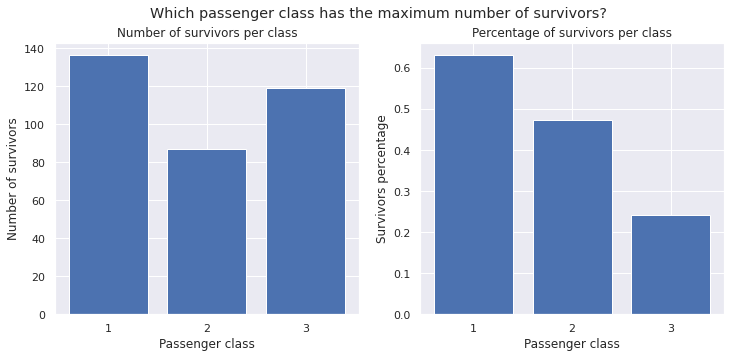

In [30]:
#Get the number of survivors per class
survived_per_class=titanic.groupby('Pclass').Survived.sum()
survived=survived_per_class.values
classes=survived_per_class.index

#Plot the number of survivors per class
plt.figure(1,figsize=(12,5))
plt.grid()
plt.suptitle('Which passenger class has the maximum number of survivors?')
plt.subplot(121)
plt.bar(classes,survived)
plt.xlabel('Passenger class')
plt.ylabel('Number of survivors')
plt.title('Number of survivors per class')
plt.xticks(classes)

#Plot the percentage of survivors per class
percent_survived_per_class=titanic.groupby('Pclass').Survived.sum()/titanic.Pclass.value_counts()
survived_percent=percent_survived_per_class.values
plt.subplot(122)
plt.bar(classes,survived_percent)
plt.xlabel('Passenger class')
plt.ylabel('Survivors percentage')
plt.title('Percentage of survivors per class')
plt.xticks(classes)

### Based from the chart, we can see that there was preference in saving the 1st class passengers. It also had largest percentage of survivors among all classes.
### *Key takeaway 1: There was a clear preference toward saving those from the first class. It also had the maximum percentage of survivors.*



# 2. What is the distribution, based on gender, of the survivors among the classes?

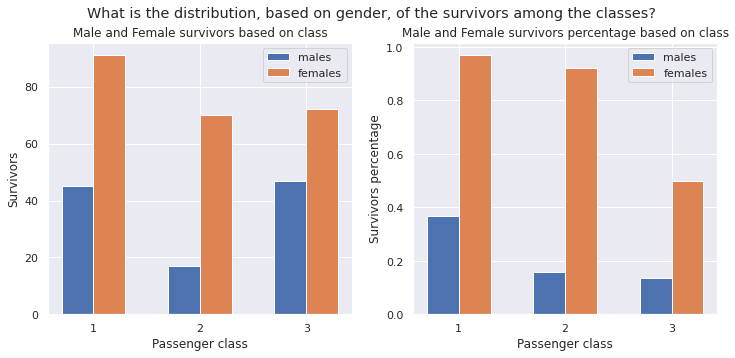

In [28]:
#Plot the number of survivors based on gender per class
male_surv = titanic[titanic.Sex=='male'].groupby('Pclass').Survived.sum()
female_surv = titanic[titanic.Sex=='female'].groupby('Pclass').Survived.sum()
plt.figure(2,figsize=(12,5))
plt.suptitle('What is the distribution, based on gender, of the survivors among the classes?')
plt.subplot(121)
width=0.3
plt.bar(classes, male_surv, width=width, label='males')
plt.bar(classes+width, female_surv, width=width, label='females')
plt.xticks(classes+width/2,classes) #This is to ensure that ticks is centered between 2 bars
plt.title('Male and Female survivors based on class')
plt.ylabel('Survivors')
plt.xlabel('Passenger class')
plt.legend()

#Plot the equivalent in percentage
plt.subplot(122)
width=0.3
total_male=titanic[titanic.Sex=='male'].groupby('Pclass').Pclass.count()
total_fem=titanic[titanic.Sex=='female'].groupby('Pclass').Pclass.count()
plt.bar(classes, male_surv/total_male, width=width, label='males')
plt.bar(classes+width, female_surv/total_fem, width=width, label='females')
plt.xticks(classes+width/2,classes) #This is to ensure that ticks is centered between 2 bars
plt.title('Male and Female survivors percentage based on class')
plt.ylabel('Survivors percentage')
plt.xlabel('Passenger class')
plt.legend()

### Based from the chart, we can see that most survivors are female in all classes. More than 90% of females in both 1st and 2nd class survived.
### *Key takeaway 2: Female passengers were given preference for lifeboats and the majority were saved.*

# 3. What is the distribution of nonsurvivors among the various classes who have family aboard the ship?

Text(0.5, 0.98, 'What is the distribution of nonsurvivors among the various classes who have family aboard the ship?')

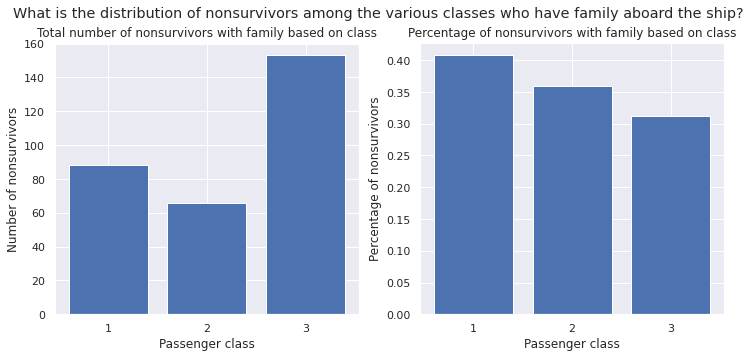

In [29]:
#Create a plot of nonsurvivors with family per class
plt.figure(3,figsize=(12,5))
nonsurvivors_with_family=titanic[(titanic['SibSp']>0)|(titanic['Parch']>0) & (titanic['Survived']==0)].groupby('Pclass').Survived.count()
nonsurvivors=nonsurvivors_with_family.values
plt.subplot(121)
plt.bar(classes,nonsurvivors)
plt.title('Total number of nonsurvivors with family based on class')
plt.xlabel('Passenger class')
plt.ylabel('Number of nonsurvivors')
plt.xticks(classes)

#Plot the equivalent in percentage
percent_nonsurvivors=nonsurvivors/titanic.Pclass.value_counts().sort_index()
plt.subplot(122)
plt.bar(classes,percent_nonsurvivors)
plt.title('Percentage of nonsurvivors with family based on class')
plt.xlabel('Passenger class')
plt.ylabel('Percentage of nonsurvivors')
plt.xticks(classes)
plt.suptitle('What is the distribution of nonsurvivors among the various classes who have family aboard the ship?')

### Based from the chart, we can see that there are indeed a lot of nonsurvivors in the 3rd class with family onboard while the 2nd class has the least nonsurvivors. With respect to total passenger per class, the 1st class has the largest number of nonsurvivors.
### *Key Takeaway: Even though the 3rd class has the highest number of nonsurvivors with relatives aboard, it mostly had passengers who did not have relatives on the ship. Whereas the 1st class passengers mostly had relatives aboard the ship.*


# 4. What was the survival percentage among different age groups?

Text(0.5, 1.0, 'Survivors in different age groups')

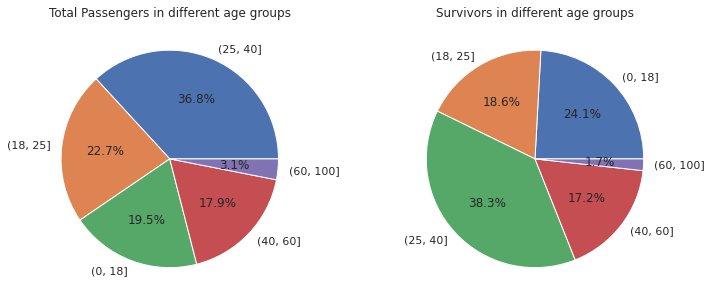

In [31]:
#Remember that the age group contains a lot of null values. So we first remove the null values.
titanic=titanic[np.isfinite(titanic['Age'])]

#Then we segregate the age accordingly using bins
age_bins=[0,18,25,40,60,100]
titanic['AgeBins']=pd.cut(titanic.Age,bins=age_bins)

#Plot total survivors per age category
ages=titanic.AgeBins.value_counts()
percent_ages=ages/titanic.AgeBins.count()
plt.figure(4,figsize=(12,5))
plt.subplot(121)
plt.pie(percent_ages.values, labels=percent_ages.index,autopct='%.1f%%')
plt.title('Total Passengers in different age groups')

#Survivors in each age group
survivors=titanic.groupby('AgeBins').Survived.sum()
plt.subplot(122)
#Pie automatically converts to percentages
plt.pie(survivors, labels=survivors.index,autopct='%.1f%%')
plt.title('Survivors in different age groups')

### We can see from the pie chart that the age group 25-40 comprises the largest number of passengers and it is also the age group with the highest number of survivors. 

### *Key takeaway: The 25-40 age group had the largest number of survivors compared to any other age group, and people who were old were either not lucky enough or made way for the younger people to the lifeboats.*
